In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.datasets import fetch_mldata
from sknn.mlp import Classifier, Layer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
netsecdata=pd.read_csv('./network.csv',sep=',')

x=netsecdata.drop([ 'id','proto', 'state', 'service',  'attack_cat'], axis=1).values
y=netsecdata['label'].values


print(x.shape)
print(y.shape)

(257673, 40)
(257673,)


In [3]:
feature_select_model=ExtraTreesClassifier()
feature_select_model.fit(x,y)
model = SelectFromModel(feature_select_model, prefit=True)
x=model.transform(x)
print(x.shape)

(257673, 6)


In [4]:
number_of_samples=len(y)

random_indices=np.random.permutation(number_of_samples)

num_train=int(number_of_samples*0.7)
num_test=int(number_of_samples*0.30)

x_train=x[random_indices[:num_train]]
y_train=y[random_indices[:num_train]]

x_test=x[random_indices[num_train:]]
y_test=y[random_indices[num_train:]]


x_arr=[]

for xi in x:
    x_arr.append(np.reshape(xi,xi.size))

x=x_arr

In [5]:
model=MLPClassifier(activation='tanh',solver='sgd',hidden_layer_sizes=(300,200,150,100,50,10),verbose=100,max_iter=25, random_state=1)

In [6]:
model.fit(x_train,y_train)

Iteration 1, loss = 0.47417571
Iteration 2, loss = 0.46134220
Iteration 3, loss = 0.45995157
Iteration 4, loss = 0.45863306
Iteration 5, loss = 0.45726282
Iteration 6, loss = 0.45730057
Iteration 7, loss = 0.45678710
Iteration 8, loss = 0.45597310
Iteration 9, loss = 0.45639751
Iteration 10, loss = 0.45536716
Iteration 11, loss = 0.45456890
Iteration 12, loss = 0.45392708
Iteration 13, loss = 0.45389479
Iteration 14, loss = 0.45398697
Iteration 15, loss = 0.45450090
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 200, 150, 100, 50, 10),
       learning_rate='constant', learning_rate_init=0.001, max_iter=25,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=100, warm_start=False)

In [7]:
predicted=model.predict(x_test)

print(accuracy_score(y_test, predicted)*100)

75.5582003053


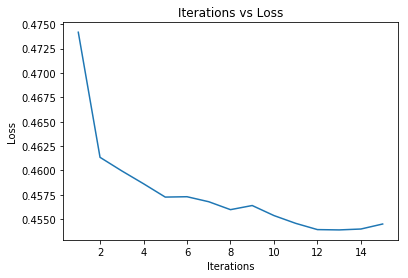

In [10]:
%matplotlib inline

iteration=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lossval=[0.47417571,0.46134220,0.45995157,0.45863306,0.45726282,0.45730057,0.45678710,0.45597310,0.45639751,0.45536716,0.45456890,0.45392708,0.45389479,0.45398697,0.45450090]

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations vs Loss')
plt.plot(iteration,lossval)

In [11]:
confusion=confusion_matrix(y_test,predicted)
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

# Accuracy
print('Accuracy:',(TP+TN)/float(TP+TN+FP+FN)*100)

#Misclassification
print('Misclassification:',(FP+FN)/float(TP+TN+FP+FN)*100)

#Sensitivity
print('Sensitivity:',(TP)/float(TP+FN)*100)

#Specificity
print('Specificty:',(TN)/float(TN+FP)*100)

#Flase Positive Rate
print('False Positive:',(FP)/float(TN+FP)*100)

#Precision Score
print('Precision Score:', (TP)/float(TP+FP)*100)

Accuracy: 75.5582003053
Misclassification: 24.4417996947
Sensitivity: 65.9909773219
Specificty: 92.5262817983
False Positive: 7.47371820172
Precision Score: 93.9976370919


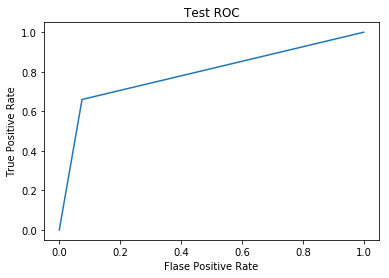

Test AUC: 79.2586295601


In [12]:
fpr,tpr,threshold=metrics.roc_curve(y_test,predicted)
plt.plot(fpr,tpr)
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test ROC')
plt.show()

print("Test AUC:",metrics.roc_auc_score(y_test,predicted)*100)